In [169]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

In [170]:
# --- 2. SETUP FOR ACADEMIC STYLE ---

font1 = 18
font2 = 16
font3 = 20

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": font1,
    "axes.labelsize": font3,
    "legend.fontsize": font1,
    "xtick.labelsize": font2,
    "ytick.labelsize": font2,
    "figure.titlesize": font3,
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}",
    # Line Widths
    "lines.linewidth": 1.7, # Main plot lines
    "axes.linewidth": 1.,  # Axis spine width
    "grid.linewidth": 1.0,  # Grid line width
    
    # Tick/Marker Properties
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
})

## Load data

In [171]:
loc2 = "../local_data/he2_log4/"
loc1 = loc2
types = 'crx'

In [172]:
energies_hee = np.load(loc1 + '/energies_' + types + '_1.npy')
convergences_hee = np.load(loc1 + '/convergences_' + types + '_1.npy')
grads_hee = np.load(loc1 + '/grad_norms_' + types + '_1.npy')
grad_variances_hee = np.load(loc1 + '/grad_variances_' + types + '_1.npy')

In [173]:
energies_ng = np.load(loc2 + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc2 + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc2 + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc2 + '/grad_variances_' + types + '_2.npy')

## Plots


In [174]:
exact_energy = -5.74032428
layers = np.arange(2, 31, 4)

In [175]:
mean_loss_hee = np.mean(energies_hee, axis=1) - exact_energy
mean_loss_ng = np.mean(energies_ng, axis=1) - exact_energy

In [176]:
min_hee = np.median(energies_hee, axis=1)[:,-1]
min_ng = np.median(energies_ng, axis=1)[:,-1]

In [177]:
min_ng

array([-3.82314527, -5.45375729, -5.64118767, -5.67596078, -5.68637514,
       -5.6936326 , -5.69636273, -5.69950747])

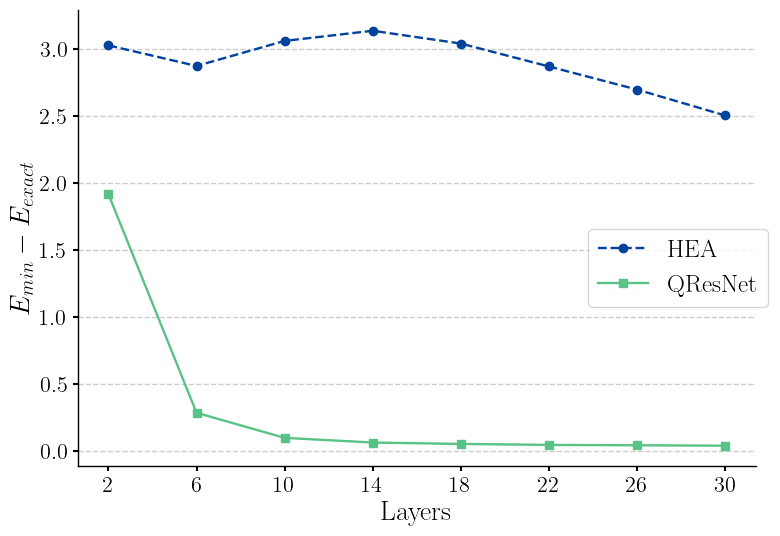

In [178]:

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(8, 6))

# --- 3. PLOT THE DATA (as energy difference) ---
# Define the color palette and styles from your example
colors = ['#00429d', '#58c287'] # Blue and Green

# Plot the difference between the calculated min energy and the exact energy
ax.plot(layers, min_hee - exact_energy, marker='o', linestyle='--', label='HEA', color=colors[0])
ax.plot(layers, min_ng - exact_energy, marker='s', linestyle='-', label='QResNet', color=colors[1])


# --- 4. STYLING AND LABELS ---
# Set axis labels with LaTeX formatting for the y-axis
ax.set_xlabel('Layers',)
ax.set_ylabel(r'$E_{min} - E_{exact}$',) # Label shows the energy difference

# Apply the clean aesthetic
ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.4)

# Customize ticks
ax.set_xticks(layers)
ax.tick_params(axis='both', which='major', )

# --- 5. CREATE A SINGLE FIGURE-LEVEL LEGEND ---
# Get handles and labels from the axis to create the legend
handles, labels = ax.get_legend_handles_labels()
# Place the legend at the top of the figure, centered
fig.legend(handles, labels, loc='center right', ncol=1, frameon=True)

# --- 6. FINALIZE AND SAVE ---
# Adjust layout to prevent labels from overlapping and make space for legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Save the figure to a PDF with high quality
# fig.savefig("min_energy.pdf", format="pdf", bbox_inches='tight')

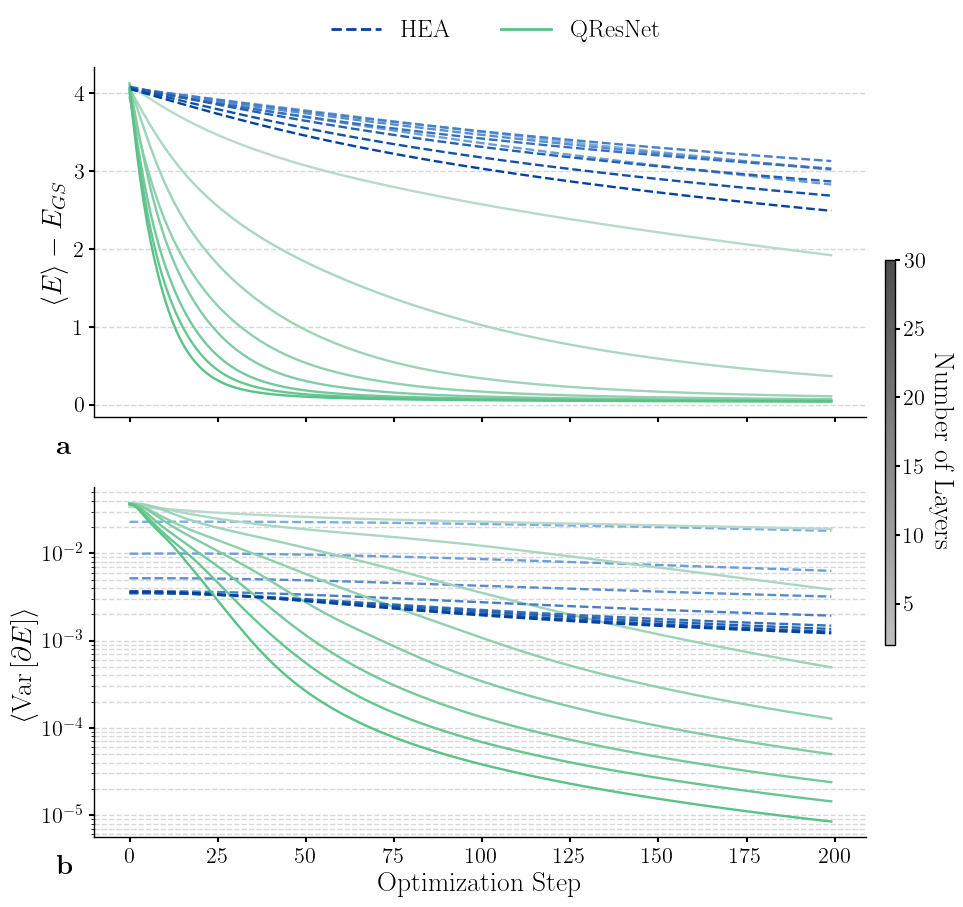

In [198]:
# --- 2. CREATE FIGURE, AXES, AND COLORMAPS ---
# Create a figure with 2 rows, 1 column of subplots. They will share the x-axis.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
steps = np.arange(energies_hee.shape[1])
# Define Colormaps and Normalization (same as before)
cmap_hee = LinearSegmentedColormap.from_list('custom_blue', ["#7bade2", '#00429d'])
cmap_ng = LinearSegmentedColormap.from_list('custom_green', ["#b8daca", '#58c287'])
norm = plt.Normalize(vmin=layers.min(), vmax=layers.max())

# --- 3. PLOT ON THE SUBPLOTS ---
# Define plot titles and data in a loop for cleaner code
plot_info = [
    {'ax': axes[0], 'label_text': r'\textbf{a}', 'title': 'Energy Convergence', 'ylabel': r'$\langle E \rangle - E_{GS}$', 'data_hee': mean_loss_hee[:, 1:], 'data_ng': mean_loss_ng[:, 1:], 'yscale': 'linear'},
    {'ax': axes[1], 'label_text': r'\textbf{b}', 'title': 'Gradient Analysis', 'ylabel': r'$\langle \text{Var}\left[\partial E\right] \rangle$', 'data_hee': mean_var_hee, 'data_ng': mean_var_ng, 'yscale': 'log'}
]

for info in plot_info:
    ax = info['ax']
    for i, l in enumerate(layers):
        ax.plot(steps, info['data_hee'][i], linestyle='--', color=cmap_hee(norm(l)))
        ax.plot(steps, info['data_ng'][i], linestyle='-', color=cmap_ng(norm(l)))

    # --- Styling for each subplot ---
    ax.set_ylabel(info['ylabel'], )
    ax.set_yscale(info['yscale']) # Set y-scale (linear or log)
    ax.grid(True, axis='y', which='both', ls="--", alpha=0.5)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='both', )
    
    # Add subplot labels (a) and (b)
    # Positioning using transform=ax.transAxes places text relative to the axes (0,0 is bottom-left, 1,1 is top-right)
    ax.text(-0.05, -0.05, info['label_text'], transform=ax.transAxes,
            fontsize=20, va='top', ha='left')

# Set the shared x-label only on the bottom plot
axes[1].set_xlabel('Optimization Step', )

# --- 4. CREATE SHARED LEGEND AND COLORBAR ---
# Create a single, custom legend for the entire figure
legend_elements = [
    Line2D([0], [0], color='#00429d', lw=2, linestyle='--', label='HEA'),
    Line2D([0], [0], color='#58c287', lw=2, linestyle='-', label='QResNet')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.46, 0.95), )

# Create a single, shared colorbar
cmap_grey = LinearSegmentedColormap.from_list('custom_grey', ['#BFBFBF', '#4D4D4D'])
sm = plt.cm.ScalarMappable(cmap=cmap_grey, norm=norm)
sm.set_array([])
# Add the colorbar to the figure, specifying all axes it applies to
cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', pad=0.02, aspect=40, shrink=0.5)
cbar.set_label('Number of Layers', rotation=270, labelpad=20,)


# --- 5. FINALIZE AND SAVE ---
#plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for the top legend
plt.show()

fig.savefig("combined_energy_variance.pdf", format="pdf", bbox_inches='tight')